# Notebook for Bayesian cooling model for Grenville Compilation

In [34]:
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import numpy as np
import theano.tensor as T
from theano.compile.ops import as_op
import arviz as az
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%config InlineBackend.figure_format='retina'

In [2]:
@as_op(itypes=[T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar], otypes=[T.dscalar])
def cooling_history_2(start_age, start_temp, rate_1, rate_2, changepoint_1, changepoint_2, end_age):
#     assume we start from the oldest 
    this_temp = start_temp
    this_age = start_age
    end_temp = None
    for changepoint, rate in sorted(zip([changepoint_1, changepoint_2], [rate_1, rate_2]),reverse=1):
#         print(rate, changepoint)
        if end_age > changepoint:
            this_temp =  this_temp - (this_age-end_age) * rate
#             print(this_temp)
            break
        else:
            this_temp = this_temp - (this_age-changepoint) * rate
            this_age = changepoint
#             print(this_temp, this_age)
    return np.array(this_temp)

In [3]:
def get_cooling_history_point_2(start_age, start_temp, rate_1, rate_2, changepoint_1, changepoint_2, end_age):
#     assume we start from the oldest 
    this_temp = start_temp
    this_age = start_age
    end_temp = None
    for changepoint, rate in sorted(zip([changepoint_1, changepoint_2], [rate_1, rate_2]),reverse=1):
#         print(rate, changepoint)
        if end_age > changepoint:
            this_temp =  this_temp - (this_age-end_age) * rate
#             print(this_temp)
            break
        else:
            this_temp = this_temp - (this_age-changepoint) * rate
            this_age = changepoint
#             print(this_temp, this_age)
    return this_temp

In [4]:
@as_op(itypes=[T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar], otypes=[T.dscalar])
def cooling_history_3(start_age, start_temp, rate_1, rate_2, rate_3, changepoint_1, changepoint_2, changepoint_3, end_age):
#     assume we start from the oldest 
    this_temp = start_temp
    this_age = start_age
    end_temp = None
    for changepoint, rate in sorted(zip([changepoint_1, changepoint_2, changepoint_3], [rate_1, rate_2, rate_3]),reverse=1):
#         print(rate, changepoint)
        if end_age > changepoint:
            this_temp =  this_temp - (this_age-end_age) * rate
#             print(this_temp)
            break
        else:
            this_temp = this_temp - (this_age-changepoint) * rate
            this_age = changepoint
#             print(this_temp, this_age)
    return np.array(this_temp)

In [5]:
def get_cooling_history_point_3(start_age, start_temp, rate_1, rate_2, rate_3, changepoint_1, changepoint_2, changepoint_3, end_age):
#     assume we start from the oldest 
    this_temp = start_temp
    this_age = start_age
    end_temp = None
    for changepoint, rate in sorted(zip([changepoint_1, changepoint_2, changepoint_3], [rate_1, rate_2, rate_3]),reverse=1):
#         print(rate, changepoint)
        if end_age > changepoint:
            this_temp =  this_temp - (this_age-end_age) * rate
#             print(this_temp)
            break
        else:
            this_temp = this_temp - (this_age-changepoint) * rate
            this_age = changepoint
#             print(this_temp, this_age)
    return this_temp

## Test model on Bancroft Terrane

In [6]:
study_summary = pd.read_csv('../data/thermochron_compilation/study_summary.csv')
study_summary = study_summary[study_summary['Age'] < 1090]
study_summary = study_summary.sort_values(by='Age', ascending=0).reset_index(drop=1)

In [7]:
closure_temp_bounds_dict = {'Biotite':[280, 60], 
                            'Hornblende':[500, 80], 
                            'Rutile':[625, 125], 
                            'Monazite':[1000,100], 
                            'Titanite':[575, 75]}

color_dict = {'Biotite':'C0', 
              'Hornblende':'C1', 
              'Rutile':'C2', 
              'Monazite':'C3', 
              'Titanite':'C4'}

In [8]:
Bancroft_records = study_summary[study_summary['Geological_Info'].str.contains('Bancroft')]
Bancroft_records = Bancroft_records[~Bancroft_records['Age_Material'].str.contains('Muscovite|Allanite|Garnet|Zircon|K-Feldspar|Phlogopite')]

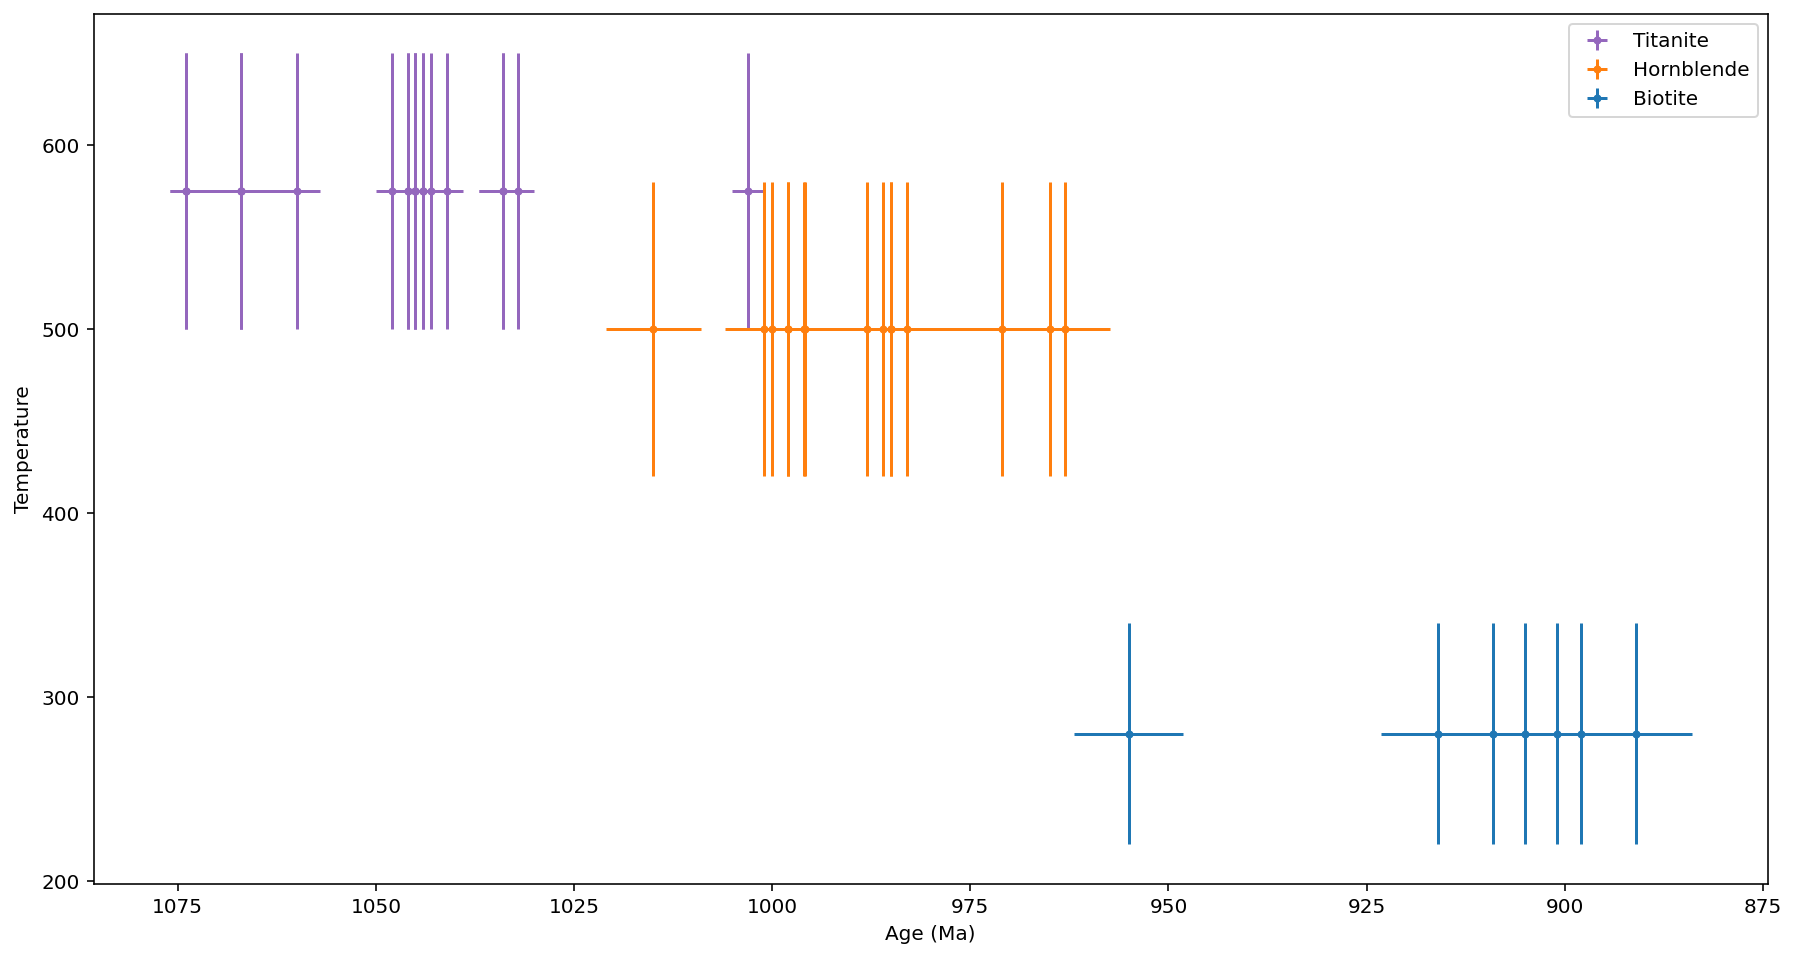

In [9]:
plt.figure(figsize=(15, 8))
for i in Bancroft_records.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Bancroft_records[Bancroft_records['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [10]:
ages = Bancroft_records['Age'].tolist()
sigmas = list((Bancroft_records['Error_Minus']+Bancroft_records['Error_Plus']).to_numpy()/2)
temps = [closure_temp_bounds_dict[i][0] for i in Bancroft_records['Age_Material'].tolist()]
temp_sigmas = [closure_temp_bounds_dict[i][1] for i in Bancroft_records['Age_Material'].tolist()]

In [11]:
print(ages)
print(sigmas)
print(temps)
print(temp_sigmas)

[1074.0, 1074.0, 1067.0, 1067.0, 1067.0, 1060.0, 1048.0, 1046.0, 1046.0, 1045.0, 1045.0, 1045.0, 1044.0, 1044.0, 1043.0, 1041.0, 1034.0, 1034.0, 1032.0, 1015.0, 1003.0, 1001.0, 1000.0, 998.0, 998.0, 996.0, 995.8, 988.0, 986.0, 985.0, 985.0, 983.0, 971.0, 965.0, 963.0, 955.0, 916.0, 909.0, 905.0, 901.0, 898.0, 891.0]
[2.0, 2.0, 2.0, 2.0, 6.0, 3.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 6.0, 2.0, 2.0, 2.0, 8.0, 7.0, 8.0, 8.0, 9.0, 3.0, 3.0, 8.0, 8.0, 8.0, 7.6, 3.0, 6.9, 7.2, 7.0, 6.1, 7.0, 7.1, 7.0]
[575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 575, 500, 575, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 280, 280, 280, 280, 280, 280, 280]
[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 80, 75, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 60, 60, 60, 60, 60, 60, 60]


In [12]:
with pm.Model() as model:
    
    start_index = np.argmax(ages)
    start_age = pm.Normal('start_age', max(ages), sigmas[start_index])
    start_temp = pm.Normal('start_temp', temps[start_index], temp_sigmas[start_index])
    
    rate_1 = pm.Uniform('rate_1', lower=0., upper=10)
    rate_2 = pm.Uniform('rate_2', lower=0., upper=10)
    
    changepoint_1 = pm.Uniform('changepoint_1', lower=min(ages), upper=max(ages))
    changepoint_2 = pm.Uniform('changepoint_2', lower=0., upper=.1)
    
    for i, (age, sigma, temp, temp_sigma) in enumerate(zip(ages, sigmas, temps, temp_sigmas)):
        print('measurement'+str(i), age, sigma, temp, temp_sigma)
        this_age = pm.Normal('age'+str(i), age, sigma)
        observed_temp = pm.Normal('measurement'+str(i), 
                                  cooling_history_2(start_age, start_temp, rate_1, rate_2, changepoint_1, changepoint_2, this_age), 
                                  np.array(temp_sigma),
                                  observed=temp)
    trace = pm.sample(5000, cores=1, chains=2, tune=1000)

measurement0 1074.0 2.0 575 75
measurement1 1074.0 2.0 575 75
measurement2 1067.0 2.0 575 75
measurement3 1067.0 2.0 575 75
measurement4 1067.0 6.0 575 75
measurement5 1060.0 3.0 575 75
measurement6 1048.0 2.0 575 75
measurement7 1046.0 1.0 575 75
measurement8 1046.0 1.0 575 75
measurement9 1045.0 2.0 575 75
measurement10 1045.0 2.0 575 75
measurement11 1045.0 2.0 575 75
measurement12 1044.0 1.0 575 75
measurement13 1044.0 1.0 575 75
measurement14 1043.0 2.0 575 75
measurement15 1041.0 2.0 575 75
measurement16 1034.0 3.0 575 75
measurement17 1034.0 3.0 575 75
measurement18 1032.0 2.0 575 75
measurement19 1015.0 6.0 500 80
measurement20 1003.0 2.0 575 75
measurement21 1001.0 2.0 500 80
measurement22 1000.0 2.0 500 80
measurement23 998.0 8.0 500 80
measurement24 998.0 7.0 500 80
measurement25 996.0 8.0 500 80
measurement26 995.8 8.0 500 80
measurement27 988.0 9.0 500 80
measurement28 986.0 3.0 500 80
measurement29 985.0 3.0 500 80
measurement30 985.0 8.0 500 80
measurement31 983.0 8.0 50

C:\Users\Berkeley_QDM\AppData\Local\Temp/ipykernel_18896/1182724386.py:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, cores=1, chains=2, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS failed. Falling back to elementwise auto-assignment.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Slice: [age41]
>Slice: [age40]
>Slice: [age39]
>Slice: [age38]
>Slice: [age37]
>Slice: [age36]
>Slice: [age35]
>Slice: [age34]
>Slice: [age33]
>Slice: [age32]
>Slice: [age31]
>Slice: [age30]
>Slice: [age29]
>Slice: [age28]
>Slice: [age27]
>Slice: [age26]
>Slice: [age25]
>Slice: [age24]
>Slice: [age23]
>Slice: [age22]
>Slice: [age21]
>Slice: [age20]
>Slice: [age19]
>Slice: [age18]
>Slice: [age17]
>Slice: [age16]
>Slice: [age15]
>Slice: [age14]

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 2439 seconds.
The number of effective samples is smaller than 10% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Berkeley_QDM\anaconda3\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Berkeley_QDM\anaconda3\envs\pymc_env\lib\site-packages\arviz\plots\traceplot.py:206: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (48), generating only 20 plots
  warnings.warn(


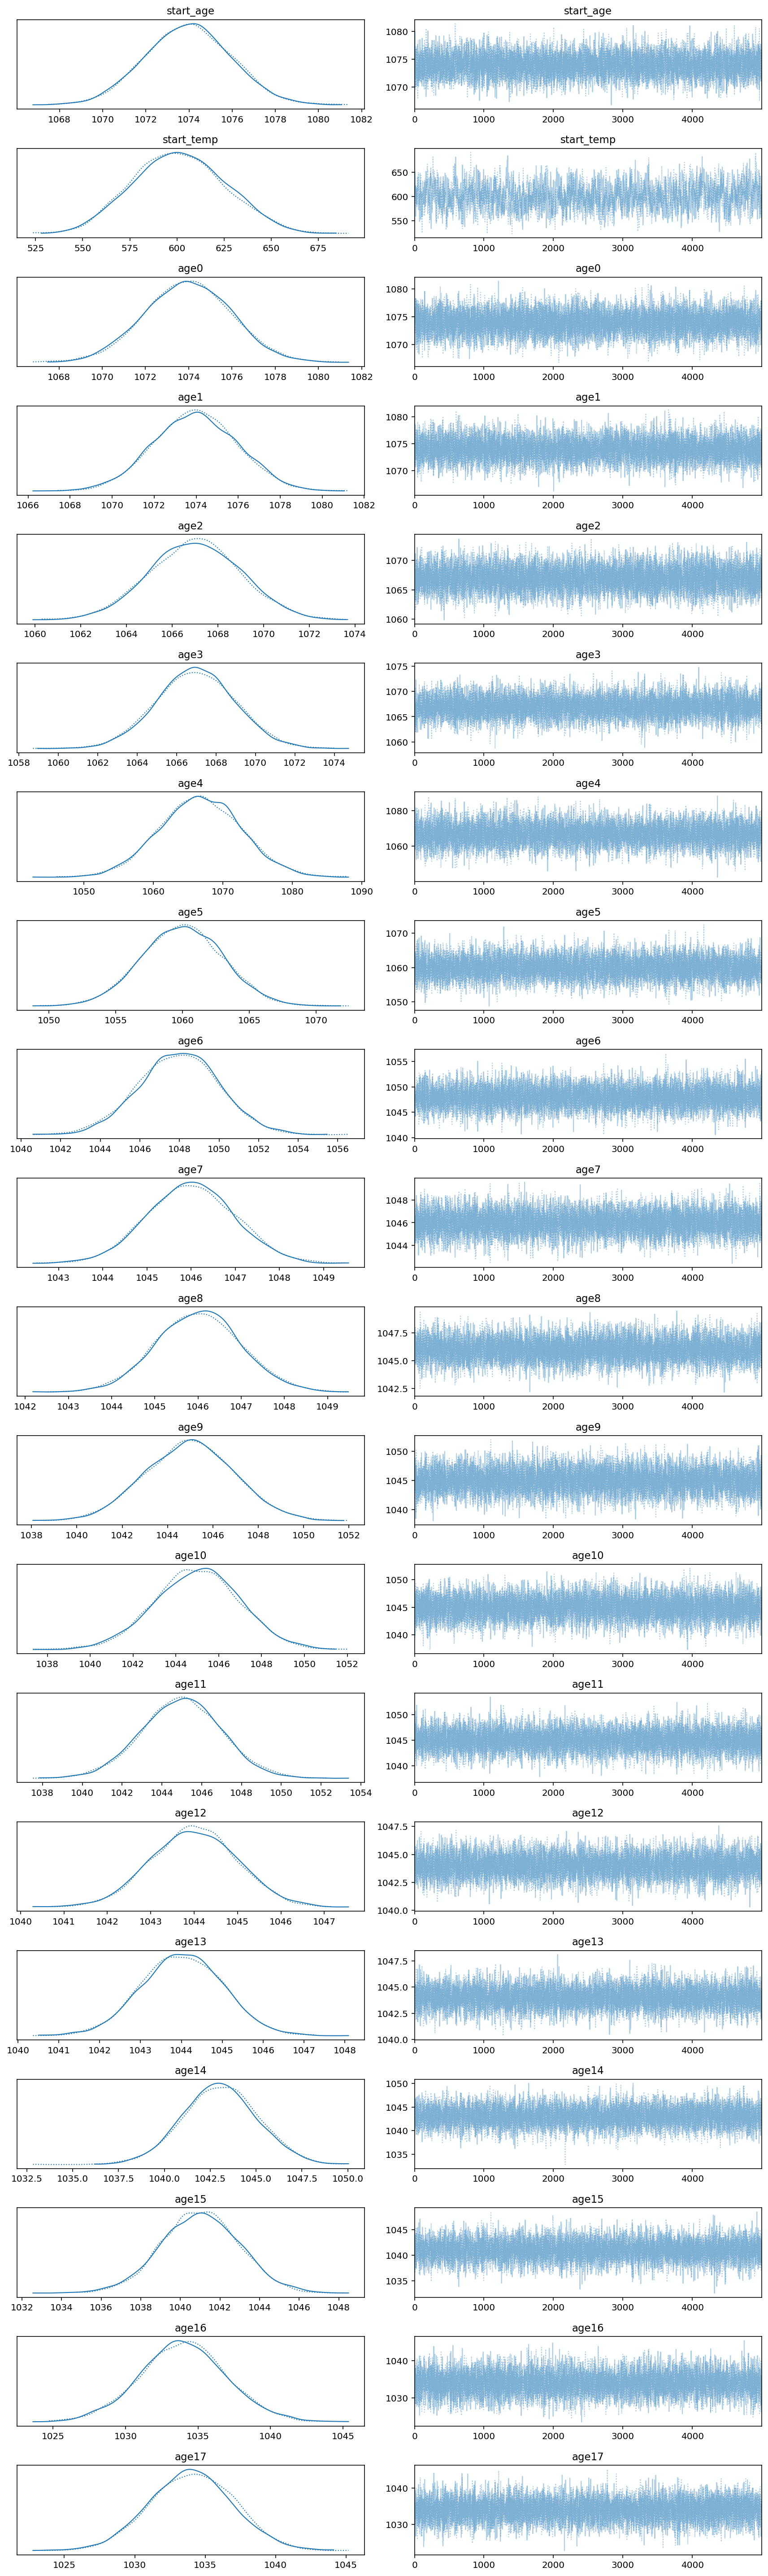

In [13]:
az.plot_trace(trace)
plt.tight_layout()

In [45]:
pm.save_trace(trace, 'code_output/Bancroft_terrane_trace', overwrite=1)

'code_output/Bancroft_terrane_trace'

In [14]:
trace_df = pm.trace_to_dataframe(trace)

In [18]:
trace_df.sample(n=1)['rate_1'].values[0]

1.5785901277654513

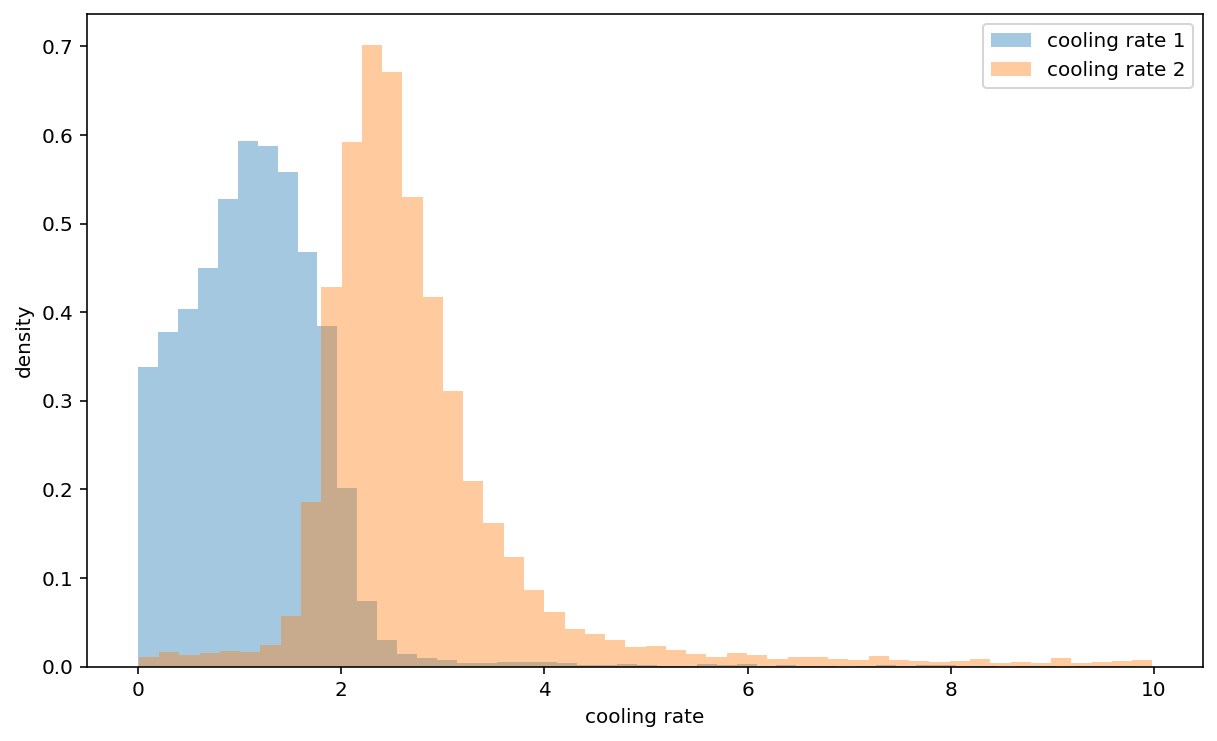

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(trace_df['rate_1'], bins=50, kde=0, norm_hist=1, label='cooling rate 1')
sns.distplot(trace_df['rate_2'], bins=50, kde=0, norm_hist=1, label='cooling rate 2')
plt.xlabel('cooling rate')
plt.ylabel('density')
plt.legend()
plt.show()

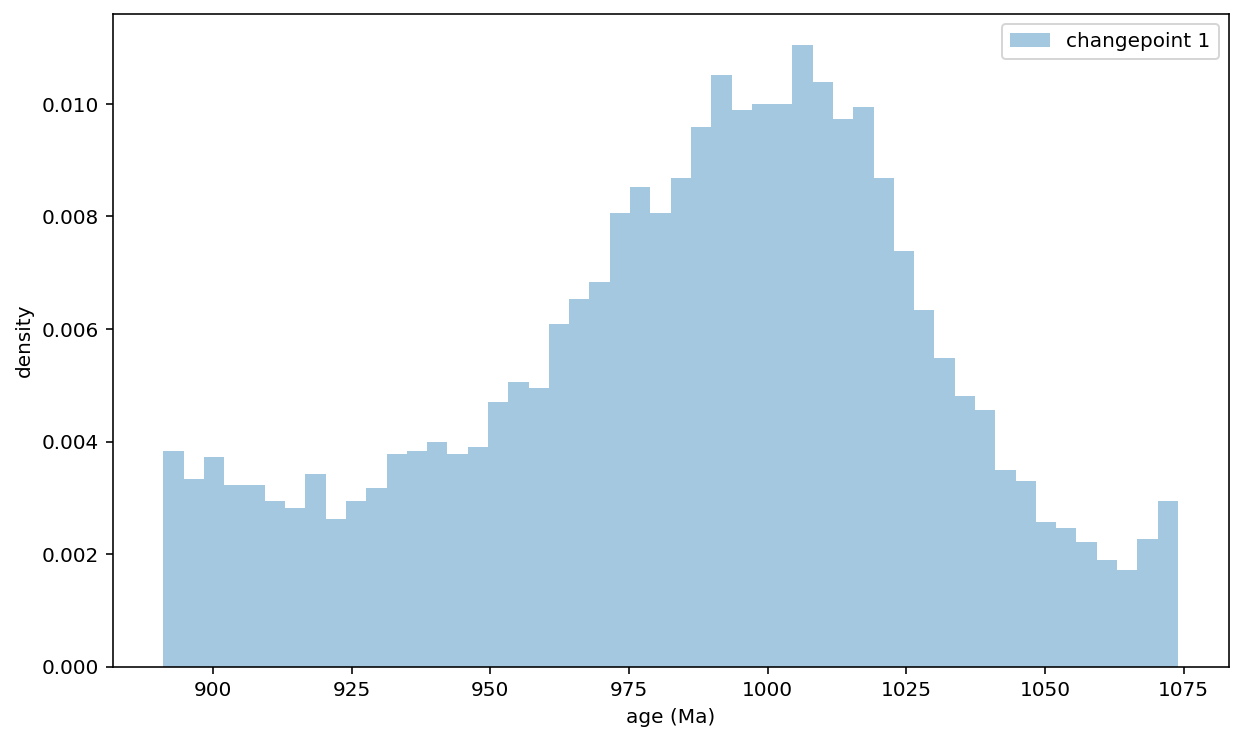

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(trace_df['changepoint_1'], bins=50, kde=0, norm_hist=1, label='changepoint 1')
plt.xlabel('age (Ma)')
plt.ylabel('density')
plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

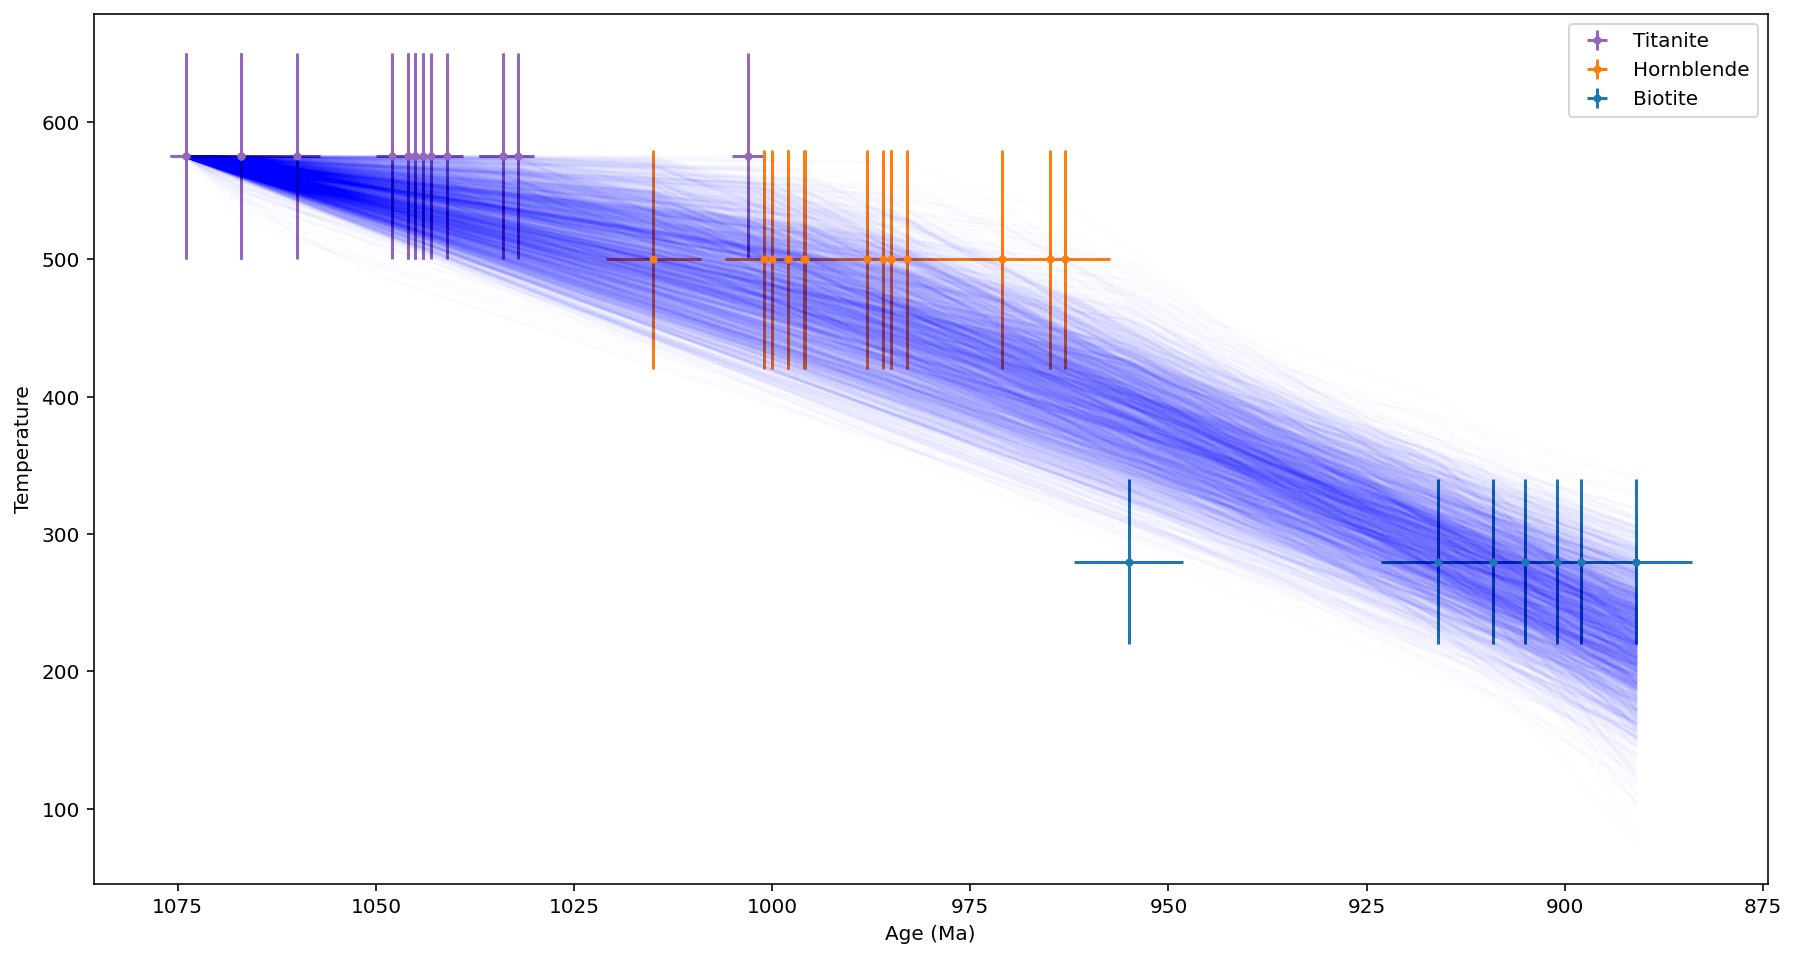

In [22]:
n_samples = 2000
x = np.linspace(max(ages), min(ages), 100)
plt.figure(figsize=(12, 8))
plt.figure(figsize=(15, 8))

for i in Bancroft_records.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Bancroft_records[Bancroft_records['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)

    
for j in range(n_samples):
    this_row = trace_df.sample(n=1)
    y = []
    for i in range(len(ages)):
        y.append(get_cooling_history_point_2(max(ages), temps[np.argmax(ages)], 
                                  this_row['rate_1'].values[0], this_row['rate_2'].values[0], 
                                  this_row['changepoint_1'].values[0], this_row['changepoint_2'].values[0], ages[i]))
    plt.plot(ages, y, color='b', alpha = 0.01)
    
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [43]:
trace_df.columns

Index(['start_age', 'start_temp', 'age0', 'age1', 'age2', 'age3', 'age4',
       'age5', 'age6', 'age7', 'age8', 'age9', 'age10', 'age11', 'age12',
       'age13', 'age14', 'age15', 'age16', 'age17', 'age18', 'age19', 'age20',
       'age21', 'age22', 'age23', 'age24', 'age25', 'age26', 'age27', 'age28',
       'age29', 'age30', 'age31', 'age32', 'age33', 'age34', 'age35', 'age36',
       'age37', 'age38', 'age39', 'age40', 'age41', 'rate_1', 'rate_2',
       'changepoint_1', 'changepoint_2'],
      dtype='object')

In [58]:
def find_x_given_y(xs, ys, y):
    if y > max(ys) or y < min(ys):
        return
    else:
        a1 = a2 = 0
        b =  b2 = 0
        k = c = 0
        for i in range(len(ys)):
            if ys[i] >= y and ys[i+1] <=y:
                a1 = xs[i]
                a2 = xs[i+1]
                b1 = ys[i]
                b2 = ys[i+1]
                k = (b1-b2)/(a1-a2)
                c = b1-a1*k
                break
        return (y-c)/k      
        
def find_age_at_temp(df, observed_ages, temp):
    age_at_temp = []
    for j in range(df.shape[0]):
        this_row = df.iloc[j]
        this_temp_segments = np.zeros(shape=len(observed_ages))
        for i in range(len(observed_ages)):
            this_temp_segments[i] = get_cooling_history_point_2(max(observed_ages), temps[np.argmax(observed_ages)], 
                                      this_row['rate_1'], this_row['rate_2'], 
                                      this_row['changepoint_1'], this_row['changepoint_2'], observed_ages[i])
        age_at_temp.append( find_x_given_y(observed_ages, this_temp_segments, temp))
    return age_at_temp

In [59]:
age_at_500 = find_age_at_temp(trace_df, ages, 500)

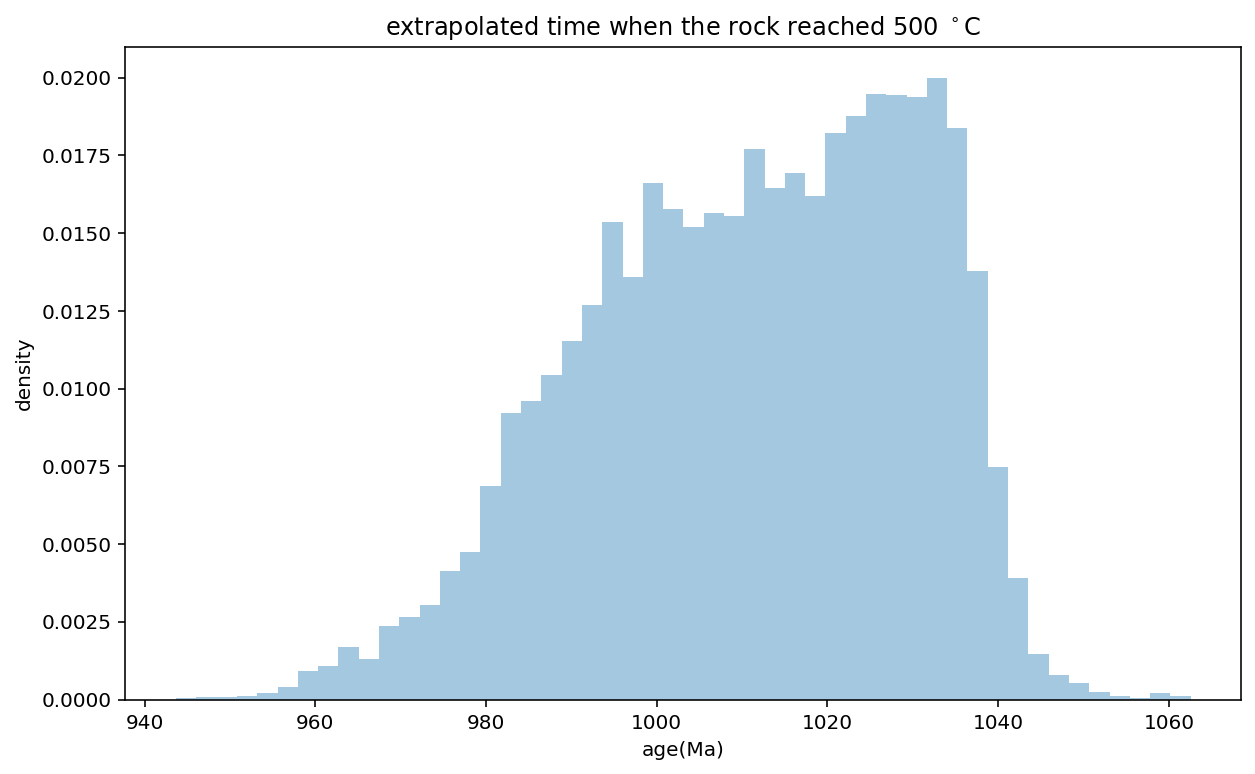

In [62]:
plt.figure(figsize=(10,6))
sns.distplot(age_at_500, kde=0, bins=50, norm_hist=1)
plt.xlabel('age(Ma)')
plt.ylabel('density')
plt.title('extrapolated time when the rock reached 500 $^\circ$C' )
plt.show()